In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

In [2]:
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])

gaussian_5x5 = (1/256.0)*np.array([[1., 4., 6., 4., 1.],
                                   [4., 16., 24., 16., 4.],
                                   [6., 24., 36., 24., 6.],
                                   [4., 16., 24., 16., 4.],
                                   ])
# for edges in X axis
sobel_edge_kernel_x = np.array([[1., 2., 1.],
                              [0., 0., 0.],
                              [-1., -2., -1]])
# for edges in Y axis
sobel_edge_kernel_y = np.array([[1., 0., -1.],
                              [2., 0., -2.],
                              [1., 0., -1.]])

In [3]:
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

In [4]:
def convolution_plotter(image, kernel):
    iterations = [1,10,50,100]
    f_size = 20
    
    fig, ax = plt.subplots(1,4, figsize = (15,7))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Iteration : {iterations[n]}', fontsize =
                     f_size)
        ax.imshow(multi_convolver(image, kernel, iterations[n]), 
                  cmap='gray')
        ax.set_axis_off()
    fig.tight_layout()

In [5]:
image1 = imread("frame_folder/harder_challenge_video/frame_0028.png")
image1 = rgb2gray(image1)

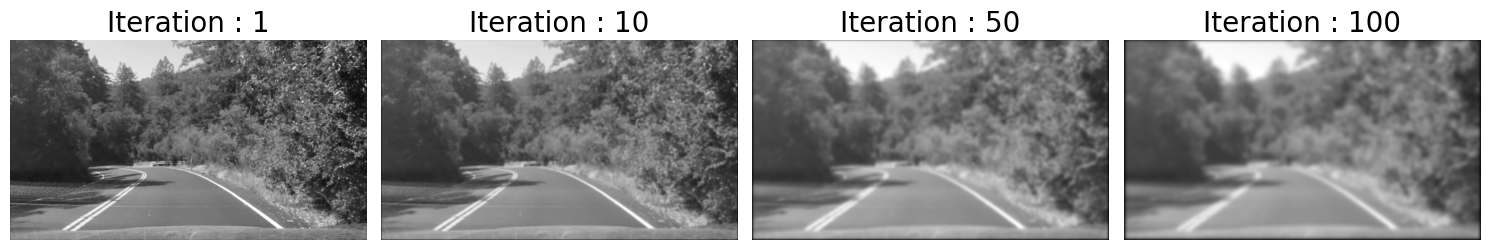

In [6]:
convolution_plotter(image1,gaussian)


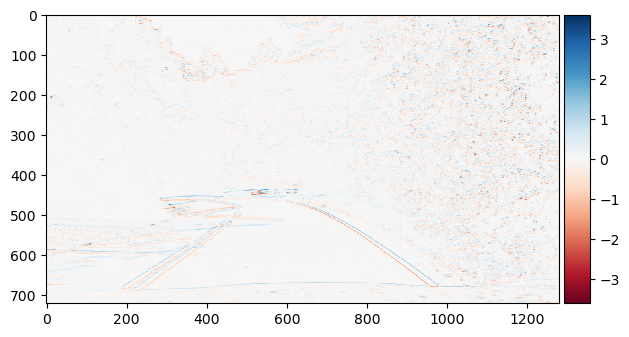

In [7]:
imshow(multi_convolver(image1,sobel_edge_kernel_x,1))

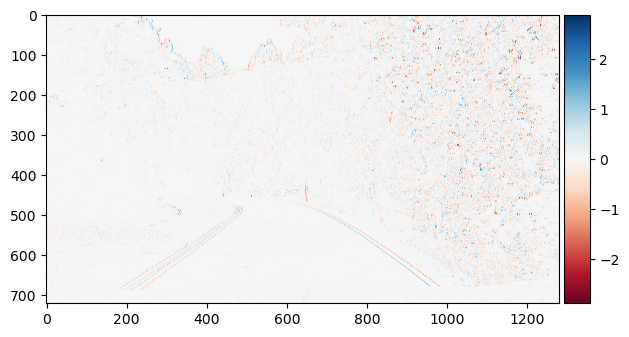

In [8]:
imshow(multi_convolver(image1,sobel_edge_kernel_y,1))

In [9]:
added_image  = multi_convolver(image1,sobel_edge_kernel_x,1)+multi_convolver(image1,sobel_edge_kernel_y,1)

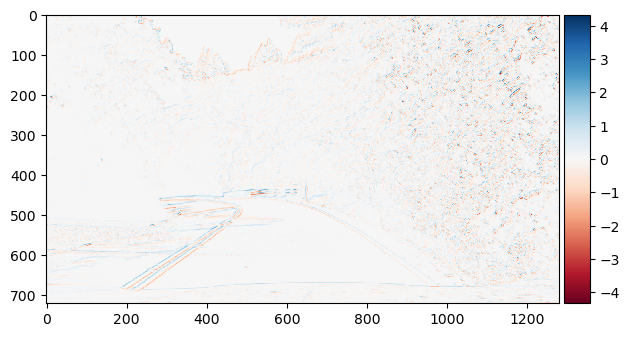

In [10]:
imshow(added_image)

/home/abhi/miniconda3/envs/pytorch/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


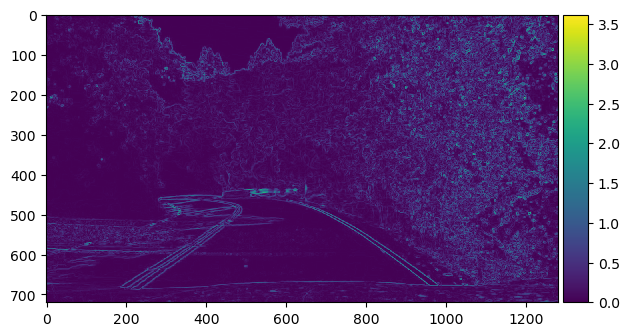

In [11]:
gradient_x = multi_convolver(image1, sobel_edge_kernel_x, 1)
gradient_y = multi_convolver(image1, sobel_edge_kernel_y, 1)

magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
imshow(magnitude)
